In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_excel('clean_data.xlsx')
data = data.drop(['district','city'],axis=True)

In [4]:
data

,area,new_num_floors,new_bedrooms,price,city_encoder,district_encoder,houseTypes_Bán Luxury home,houseTypes_Bán Nhà,houseTypes_Bán Nhà cổ,houseTypes_Bán Nhà mặt phố,houseTypes_Bán Nhà riêng
0,130.0,3,7,9.20,9.292954,8.661038,0,0,0,0,1
1,65.0,2,2,2.90,7.417350,7.708597,0,0,0,0,1
2,90.0,5,5,14.00,11.089988,8.835714,0,0,0,0,1
3,30.0,1,2,3.70,9.292954,6.731978,0,0,0,0,1
4,38.0,3,3,4.40,9.292954,11.315324,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
8091,61.0,3,4,9.50,9.292954,6.731978,0,0,0,0,1
8092,64.0,3,5,9.50,9.292954,11.315324,0,0,0,0,1
8093,60.0,3,3,5.40,9.292954,7.525423,0,0,0,0,1
8094,90.0,2,2,2.85,3.986999,4.159400,0,0,0,0,1


<AxesSubplot: >

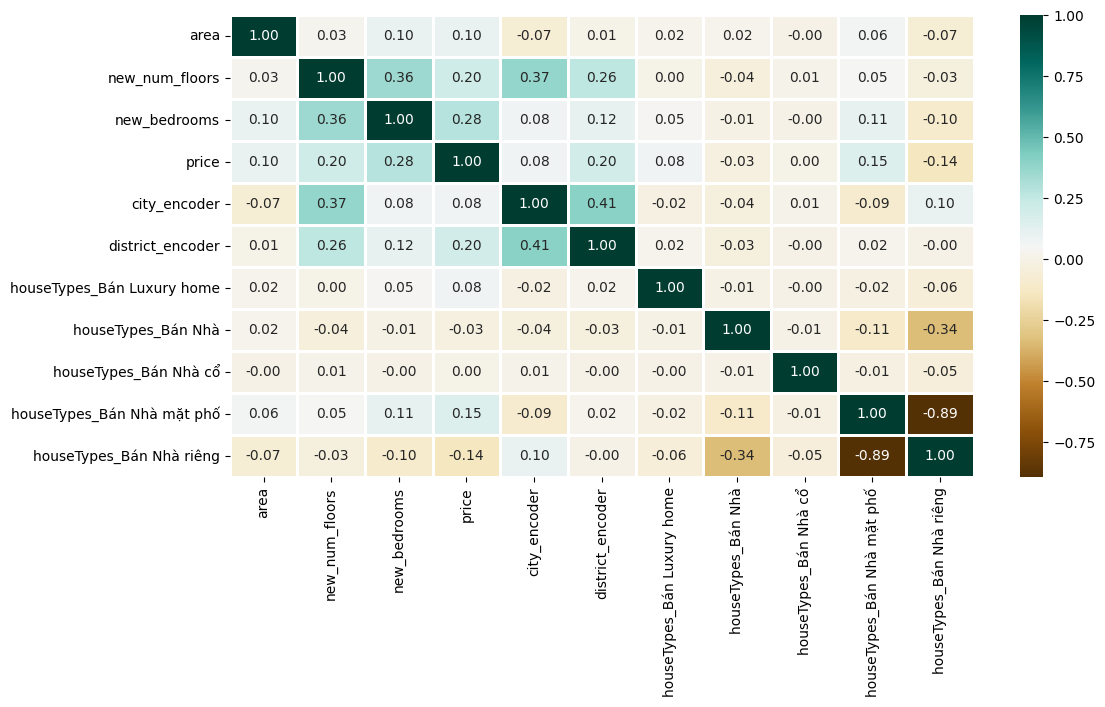

In [5]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), cmap = 'BrBG',fmt = '.2f',linewidths = 2,annot = True)

array([[<AxesSubplot: title={'center': 'area'}>,
        <AxesSubplot: title={'center': 'new_num_floors'}>,
        <AxesSubplot: title={'center': 'new_bedrooms'}>],
       [<AxesSubplot: title={'center': 'city_encoder'}>,
        <AxesSubplot: title={'center': 'district_encoder'}>,
        <AxesSubplot: title={'center': 'houseTypes_Bán Luxury home'}>],
       [<AxesSubplot: title={'center': 'houseTypes_Bán Nhà'}>,
        <AxesSubplot: title={'center': 'houseTypes_Bán Nhà cổ'}>,
        <AxesSubplot: title={'center': 'houseTypes_Bán Nhà mặt phố'}>],
       [<AxesSubplot: title={'center': 'houseTypes_Bán Nhà riêng'}>,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

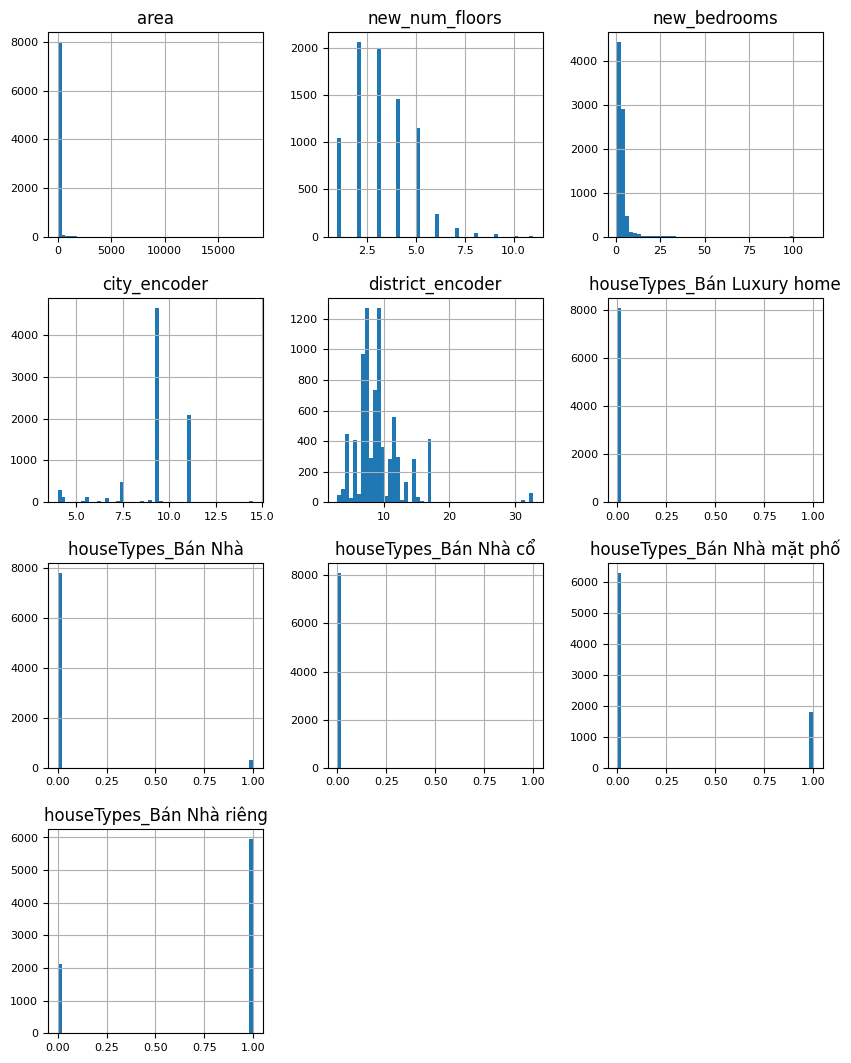

In [6]:
features = data.drop(['price'], axis=True)
features.hist(figsize=(10,13), bins=50, xlabelsize=8, ylabelsize=8)

In [7]:
new_house_data = pd.read_excel('full_data_not_encoding.xlsx')

In [8]:
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder

# encoding city
target_encoder =ce.TargetEncoder() 
new = target_encoder.fit_transform(new_house_data[['city','district','houseTypes']],new_house_data['price'])
new = new.rename(columns={'city':'city_encoder','district':'district_encoder','houseTypes':'houseTypes_encoder'})
data_encoded = pd.concat([new_house_data, new], axis=1)


# Xóa các cột gốc trong biến data
data_encoded.drop(['houseTypes','city','district'], axis=1, inplace=True)


print(data_encoded.head(10))

    area  new_num_floors  new_bedrooms  price  city_encoder  district_encoder  \
0  130.0               3             7    9.2      9.292954          8.661038   
1   65.0               2             2    2.9      7.417350          7.708597   
2   90.0               5             5   14.0     11.089988          8.835714   
3   30.0               1             2    3.7      9.292954          6.731978   
4   38.0               3             3    4.4      9.292954         11.315324   
5   45.0               2             2    3.9      9.292954          7.525423   
6   51.0               6             4   12.7      9.292954          6.731978   
7   50.0               4             4   25.0     11.089988         14.754023   
8  160.0               3             3    4.5      8.617771          8.617771   
9   48.0               5             4    7.4      9.292954          6.731978   

   houseTypes_encoder  
0            7.343849  
1            7.343849  
2            7.343849  
3           

<AxesSubplot: >

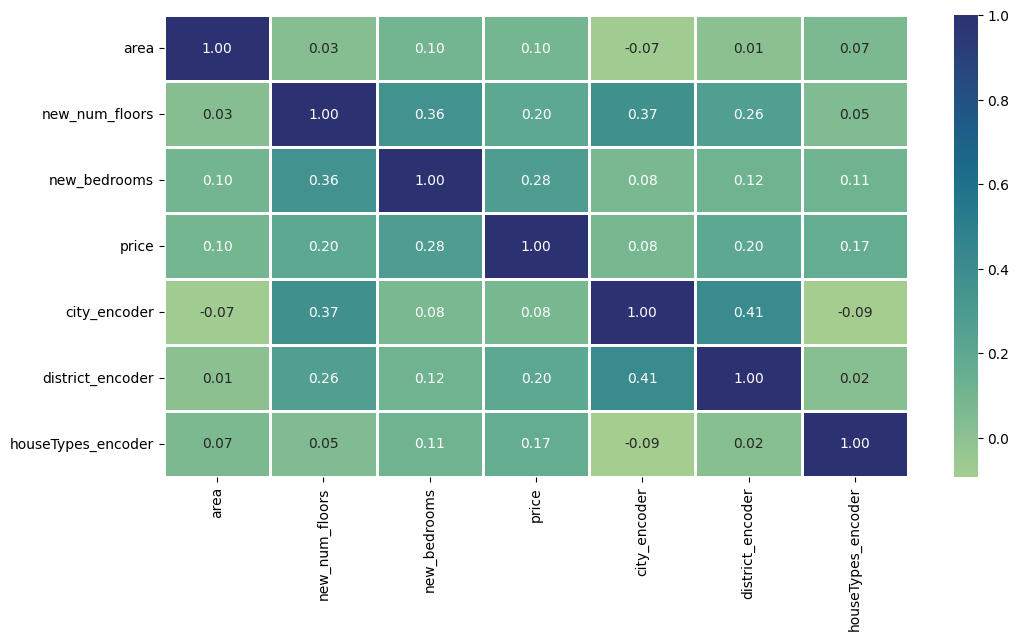

In [12]:
plt.figure(figsize=(12, 6))
sns.heatmap(data_encoded.corr(), cmap="crest",fmt = '.2f',linewidths = 2,annot = True)

In [22]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
 
X = data_encoded.drop(['price'], axis=1)
Y = data_encoded['price']

X = StandardScaler().fit_transform(X.values)

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=0)

In [23]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score,mean_absolute_percentage_error
 
model_SVR = svm.SVR()
model_SVR.fit(X_train,y_train)
y_pred = model_SVR.predict(X_test)
 

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
print(mean_absolute_percentage_error(y_test, y_pred))
print("MSE: ", mse)
print("MAE: ", mae)
print("variance: ", evs)

0.5435626194917371
MSE:  519.1905383103241
MAE:  5.016113878825534
variance:  0.09457318010663907


In [17]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score,mean_absolute_percentage_error


class splitData():
    def __init__(self):
        self.X_train = []
        self.X_test = []
        self.y_train = []
        self.y_test = []
    
    def split(self, x, y):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(x, y, test_size=0.1, random_state=42, shuffle=True)

features = ['district_encoder',\
        'area',\
        'new_num_floors',\
        'new_bedrooms',\
        'houseTypes_Bán Luxury home',\
        'houseTypes_Bán Nhà',\
        'houseTypes_Bán Nhà cổ',\
        'houseTypes_Bán Nhà mặt phố',\
        'houseTypes_Bán Nhà riêng']

df = pd.read_excel('HCM_data.xlsx')
df_tranform = pd.DataFrame(data = StandardScaler().fit_transform(df.loc[:, features].values), columns = features)
y = df['price'].values
x = df_tranform[features].values
data = splitData()
data.split(x, y)

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(data.X_train, data.y_train)
y_pred = model_RFR.predict(data.X_test)
 
mse = mean_squared_error(data.y_test, y_pred)
mae = mean_absolute_error(data.y_test, y_pred)
evs = explained_variance_score(data.y_test, y_pred)
print(mean_absolute_percentage_error(data.y_test, y_pred))
print("MSE: ", mse)
print("MAE: ", mae)
print("variance: ", evs)



0.9013749029260575
MSE:  484.4775908075637
MAE:  5.168437916170449
variance:  0.10430682554440784


In [22]:

from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error
 
class splitData():
    def __init__(self):
        self.X_train = []
        self.X_test = []
        self.y_train = []
        self.y_test = []
    
    def split(self, x, y):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(x, y, test_size=0.3, random_state=42, shuffle=True)

features = ['district_encoder',\
        'area',\
        'new_num_floors',\
        'new_bedrooms',\
        'houseTypes_Bán Luxury home',\
        'houseTypes_Bán Nhà',\
        'houseTypes_Bán Nhà cổ',\
        'houseTypes_Bán Nhà mặt phố',\
        'houseTypes_Bán Nhà riêng']

df = pd.read_excel('HCM_data.xlsx')
df_tranform = pd.DataFrame(data = StandardScaler().fit_transform(df.loc[:, features].values), columns = features)
y = df['price'].values
x = df_tranform[features].values
data = splitData()
data.split(x, y)


model_SVR = svm.SVR()
model_SVR.fit(data.X_train, data.y_train)
y_pred = model_SVR.predict(data.X_test)
 
print(mean_absolute_percentage_error(data.y_test, y_pred))

0.5404590630455159
